<h1 style="text-align: center">Card Fraud Detection</h1>
<h1 style="text-align: center">*********************************************************************************</h1>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# <h1 style="text-align: center">Step 1: Data Loading</h1>

In [6]:
file_path = 'credit_card_fraud_dataset.csv'  
data = pd.read_csv(file_path)

# <h1 style="text-align: center">Step 2: Data Cleaning</h1>

In [9]:
data.dropna(inplace=True)
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['TransactionMonth'] = data['TransactionDate'].dt.month
data['TransactionHour'] = data['TransactionDate'].dt.hour
data = data.drop(['TransactionID', 'TransactionDate'], axis=1)

# <h1 style="text-align: center">Step 3: Encoding Categorical Variables</h1>

In [12]:
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# <h1 style="text-align: center">Step 4: Exploratory Data Analysis (EDA)</h1>

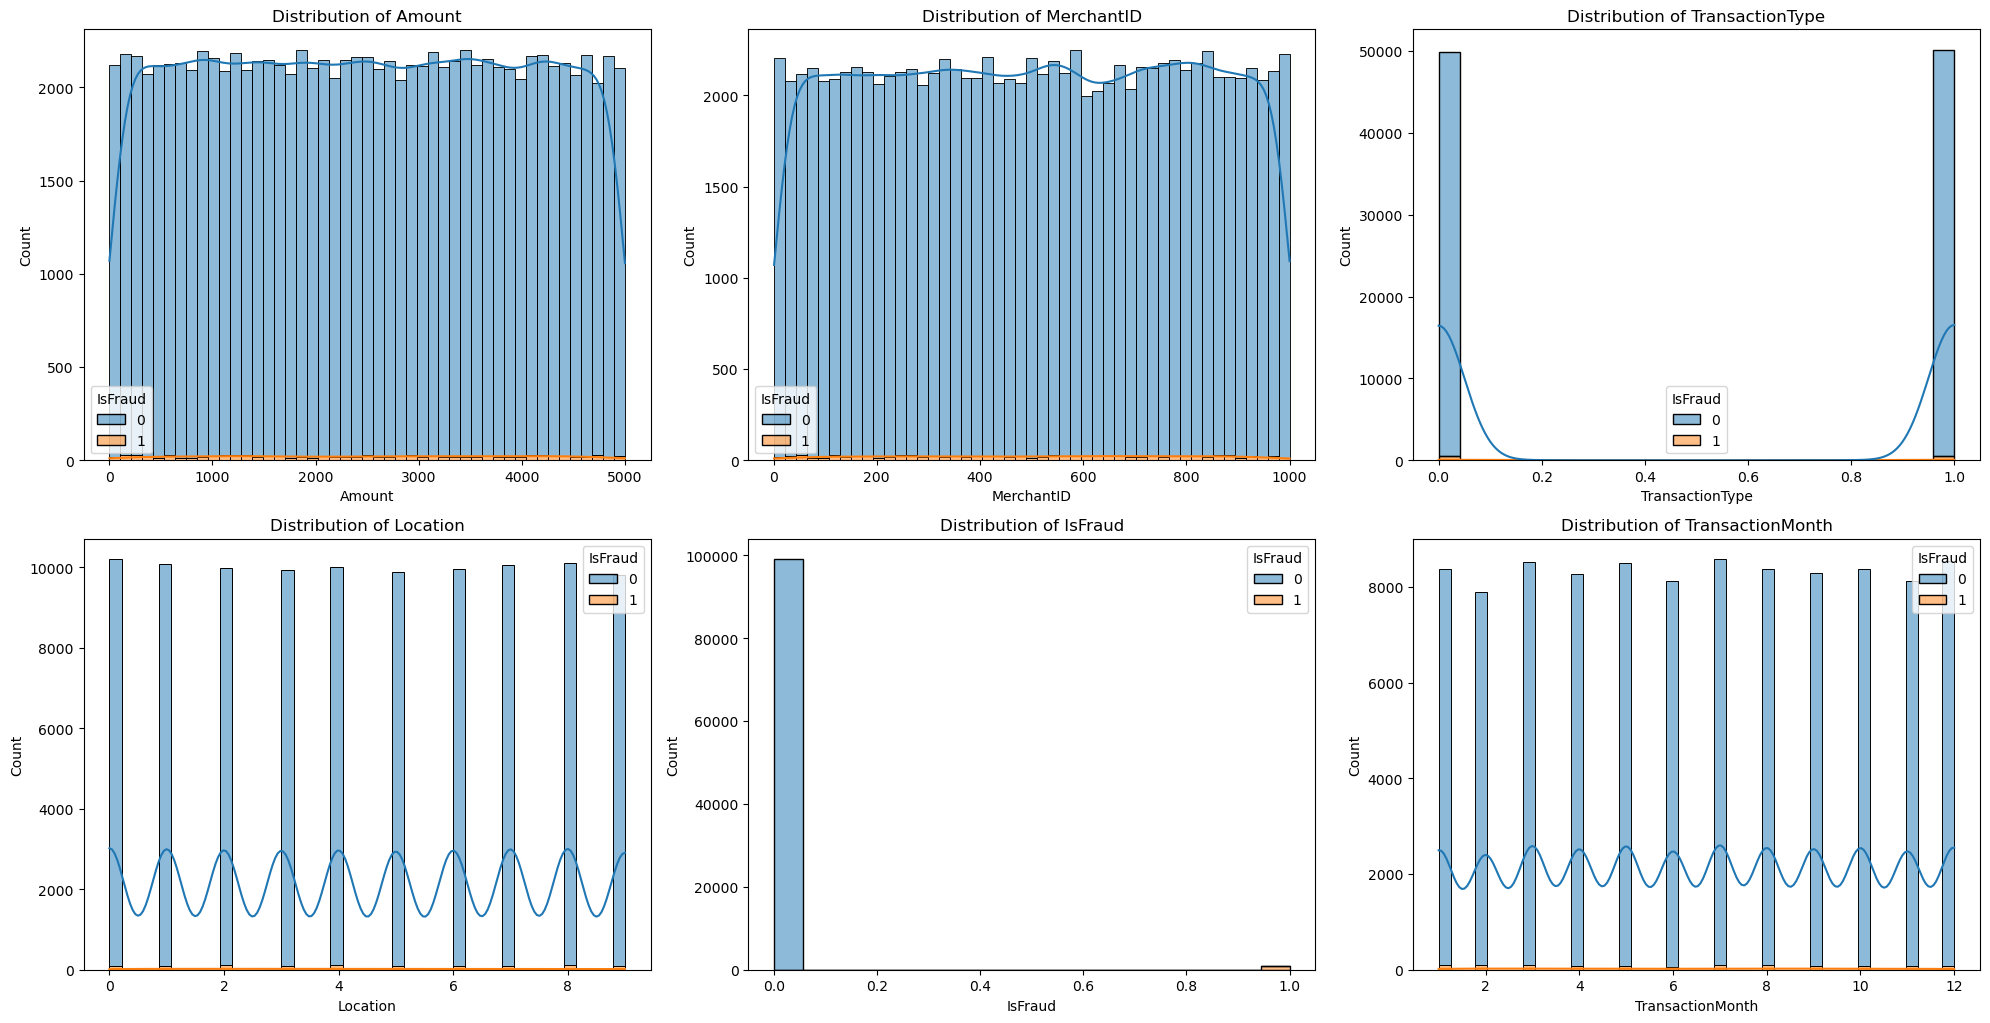

In [15]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=column, hue="IsFraud", multiple="stack", kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# <h1 style="text-align: center">Step 5: Data Splitting and Scaling</h1>

In [18]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <h1 style="text-align: center">Step 6: Model Training and Evaluation</h1>


In [21]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=50),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Classification Report

In [39]:
class_report = classification_report(y_test, y_pred_best, output_dict=True)

# ROC Curve and AUC

In [42]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# <h1 style="text-align: center">Step 7: Combined Evaluation Output</h1>

Text(195.72222222222223, 0.5, 'Actual')

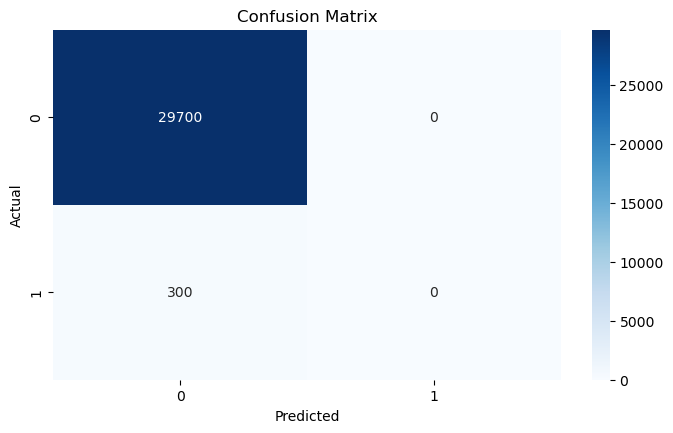

In [55]:


plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ROC Curve

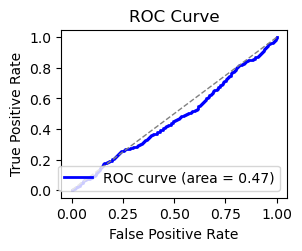

In [58]:
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc="lower right")

In [ ]:




# Classification Report as Heatmap
plt.subplot(2, 2, 3)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report")

plt.tight_layout()
plt.show()
